In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Trying Tang and Chevalier Solutions

[Tang & Chevalier 2017](https://ui.adsabs.harvard.edu/abs/2017MNRAS.465.3793T/abstract) gives solutions for shock radius evolving from ejecta-dominated to Sedov Taylor phase for ejecta with profile ($\rho_{ej} \propto v^{-n}$) uniform ambient medium ($\rho_0$) and wind profile ($\rho = \dfrac{\dot{M}}{4\pi v_w} r^{-2}$).

For $n=2$ ejecta, the solutions are given in Table 1. Inserting the values, I get :-

$R^*_b(t^*) = 2.91489 t^* (1 + 9.36843t^{*0.567})^{-0.5882}$

$v^*_b(t^*) = \dfrac{d R^*_b}{d t^*} = (2.91489 + 18.2t^{*0.567})(1 + 9.36843 t^{*0.567})^{-1.5882}$

where the dimensionless radius, velocity and age are $R^*_b = R_b/R_{ch}$, $v^*_b = v_b/v_{ch}$ and $t^*_b = t/t_{ch}$. The variables $R_b$, $v_b$ and $t$ are in physical units (AND also the quantities we plot below), and the characteristic variables are defined as :-

$R_{ch} = (12.9 pc)\left(\dfrac{M_{ej}}{M_{\odot}}\right) \left(\dfrac{\dot{M}}{10^{-5} M_{\odot}/yr}\right)^{-1} \left(\dfrac{v_w}{10 km/s}\right)$

$t_{ch} = (1770 yr)\left(\dfrac{E}{10^{51} erg}\right)^{-1/2} \left(\dfrac{M_{ej}}{M_{\odot}}\right)^{3/2} \left(\dfrac{\dot{M}}{10^{-5} M_{\odot}/yr}\right)^{-1} \left(\dfrac{v_w}{10 km/s}\right)$

$v_{ch} = (7126.28 km/s)\left(\dfrac{E}{10^{51} erg}\right)^{1/2}\left(\dfrac{M_{ej}}{M_{\odot}}\right)^{-1/2}$




In [2]:
def tch(mej, e51, mdot, vw):
    """
    Characteristic time in terms of scaling relation
    """
    
    return 1770.*((e51)**(-0.5))*(mej**(1.5))*((mdot/1.0e-5)**(-1))*(vw/10)

def rch(mej, mdot, vw):
    """
    Characteristic radius
    """
    
    return 12.9*mej*((mdot/1.0e-5)**(-1))*(vw/10)

def vch(mej, e51):
    """
    Characeteristic velocity
    """
    return 7126.28*(e51**0.5)*(mej**(-0.5))

def rshock(tyr, mej, e51, mdot, vw):
    """
    Dimensionless radius for n=2 ejecta
    
    Parameters:
    -----------
    tyr: age in years
    mej: ejecta mass [Msun]
    e51: kinetic energy [in units of 10^51 ergs]
    mdot: mass-loss rate [Msun/yr]
    vw: wind velocity [km/s]
    
    Returns:
    --------
    radius in cm
    """
    
    #Characteristic radius for a given ejecta mass, mass-loss rate
    rc = rch(mej, mdot, vw) #pc
    #Characteristic time
    tc = tch(mej, e51, mdot, vw) #yr
    
    #Converting time to dimensionless time 
    tst = tyr/tc
    #Dimensionless radius
    rstar = 2.91489*tst*(1 + 9.36843*(tst**0.567))**(-0.5882)
    #Return radius in units of cm
    return rstar*rc*3.0856775814671913e+18 #cm

def vshock(tyr, mej, e51, mdot, vw):
    """
    Dimensionless radius for n=2 ejecta
    
    Parameters:
    -----------
    tyr: age in years
    mej: ejecta mass [Msun]
    e51: kinetic energy [in units of 10^51 ergs]
    mdot: mass-loss rate [Msun/yr]
    vw: wind velocity [km/s]
    
    Returns:
    --------
    velocity in km/s in cm
    """
    
    #Characteristic time
    tc = tch(mej, e51, mdot, vw) #yr
    #Characteristic velocity
    vc = vch(mej, e51) #km/s
    
    #Converting time to dimensionless time 
    tst = tyr/tc
    #Dimensionless velocity
    vstar = (2.91489 + 18.2*(tst**0.567))*((1 + 9.36843*(tst**0.567))**(-0.5882-1))
    #Return velocity in units of km/s
    return vstar*vc #km/s

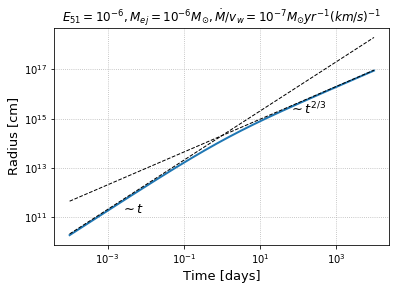

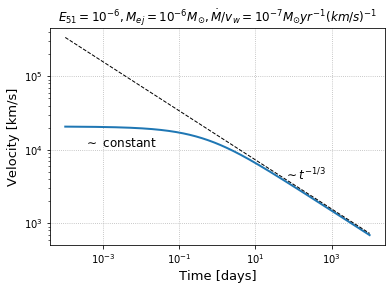

In [11]:
#Setting energy, mass, mass-loss rate, wind velocity
ejecta_mass = 1.0e-6 #msun
kin_energy = 1.0e-6 # x 10^51 ergs
Mdot = 1.0e-7 #Msun/yr
vw = 10 #km/s

t = np.logspace(-4,4, 1000) #days
tyr = t/365 #in years
v = vshock(tyr, ejecta_mass, kin_energy, Mdot, vw)
r = rshock(tyr, ejecta_mass, kin_energy, Mdot, vw)

plt.plot(t, r, '-', lw=2.)
plt.title('$E_{51}=10^{-6}, M_{ej}=10^{-6} M_{\odot}, \dot{M}/v_w = 10^{-7} M_{\odot} yr^{-1} (km/s)^{-1}$')
plt.plot(t, 2.0e14*(t**(2/3)), 'k--', lw=1.)
plt.plot(t, 2.0e14*t, 'k--', lw=1.)
plt.text(0.7, 0.6, '$\sim t^{2/3}$', fontsize=13, transform=plt.gca().transAxes)
plt.text(0.2, 0.15, '$\sim t$', fontsize=13, transform=plt.gca().transAxes)
plt.xlabel('Time [days]', fontsize=13)
plt.ylabel('Radius [cm]', fontsize=13)
plt.yscale('log')
plt.xscale('log')
plt.grid(ls='dotted')
plt.show()



plt.plot(t, v, '-', lw=2.)
plt.plot(t, 1.57e4*(t**(-1/3)), color='k', lw=1., ls='--')
plt.text(0.1, 0.45, '$\sim$ constant', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.7, 0.3, '$\sim t^{-1/3}$', fontsize=12, transform=plt.gca().transAxes)
plt.title('$E_{51}=10^{-6}, M_{ej}=10^{-6} M_{\odot}, \dot{M}/v_w = 10^{-7} M_{\odot} yr^{-1} (km/s)^{-1}$')
plt.xlabel('Time [days]', fontsize=13)
plt.ylabel('Velocity [km/s]', fontsize=13)
plt.yscale('log')
plt.xscale('log')
plt.grid(ls='dotted')
plt.show()

This shows the radius and velocity for typical values of energy, ejecta mass for novae, and $\dot{M}, v_w$ for red giant wind. The shock radius initially is freely expanding, so $R_b \sim t$, but then it transitions to the Sedov phase ($R_b \sim t^{2/3}$) (different from $\sim t^{2/5}$ which is true for uniform density ambient medium). Similarly the velocity ($= dR_b/dt$) is initially constant, then decelerates as $\sim t^{-1/3}$